<a href="https://colab.research.google.com/github/GitMarco27/TMML/blob/main/001_First_Net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3 Minutes Machine Learning
## Episode 1: First Net - Part I

#### Marco Sanguineti, 2021
---
Welcome to 3 minutes Machine Learning!

In [1]:
!pip install gTTS

In [2]:
# Let's load some libraries
import matplotlib.pyplot as plt
from gtts import gTTS #Import Google Text to Speech
from IPython.display import Audio #Import Audio method from IPython's Display Class

Import Google text to speech

In [3]:
!pip install gtts

In [4]:
tts = gTTS('Welcome to 3 Minutes Machine Learning. Colaboratory, or “Colab” for short, is a product from Google Research. Colab allows anybody to write and execute arbitrary python code through the browser, and is especially well suited to machine learning, data analysis and education. More technically, Colab is a hosted Jupyter notebook service that requires no setup to use, while providing free access to computing resources including GPUs. Find out more at the following link') #Provide the string to convert to speech
tts.save('1.wav') #save the string converted to speech as a .wav file
sound_file = '1.wav'
print('Welcome Audio')
Audio(sound_file, autoplay=True) 

Welcome Audio


In [5]:
def loadThumb(path):
  # Let's import this video thumbnail!
  myThumb = plt.imread(path)
  fig, ax = plt.subplots(figsize=(15, 10))
  plt.axis('off')
  ax.imshow(myThumb)
  plt.show()

In [6]:
# loadThumb('/tmp/yt_thumb_001.png')

#### Video Topics
> 1. Familiarize yourself with colab
> 2. Import a Simple Dataset
> 3. Create the simplest machine learning model with tensorflow
> 4. See you on next video! 

# Google colab: why
---

Colaboratory, or “Colab” for short, is a product from Google Research. Colab allows anybody to write and execute arbitrary python code through the browser, and is especially well suited to machine learning, data analysis and education. More technically, Colab is a hosted Jupyter notebook service that requires no setup to use, while providing free access to computing resources including GPUs. Find out more at this [link](https://research.google.com/colaboratory/faq.html).

Keywords
> 1. Python Code
> 2. Machine learning and data analysis
> 3. **Free for everyone**

# Import a simple Dataset
---

In [7]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import pandas as pd
from sklearn.metrics import r2_score
from scipy.stats import pearsonr

In [8]:
# fig, ax = plt.subplots(figsize=(15, 15))
# plt.imshow(plt.imread('houses.png'))
# plt.axis('off')
# plt.show()

Let's import our dataset! Our aim is to develop a model capable of establishing a relationship between input and output. In this case, we want to predict the price of houses as accurately as possible! The data are splitted into 2 datasets:
> 1. Training dataset
> 2. Test dataset

In [9]:
(train_features, train_labels), (test_features, test_labels) = keras.datasets.boston_housing.load_data()

In [10]:
print(f'My dataset has {train_features.shape[0]}, {train_features.shape[1]} features and {test_labels.reshape(-1, 1).shape[1]} labels')

My dataset has 404, 13 features and 1 labels


In [11]:
pd.DataFrame(train_features).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.745111,11.480198,11.104431,0.061881,0.557356,6.267082,69.010644,3.740271,9.440594,405.898515,18.475990,354.783168,12.740817
std,9.240734,23.767711,6.811308,0.241238,0.117293,0.709788,27.940665,2.030215,8.698360,166.374543,2.200382,94.111148,7.254545
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000
25%,0.081437,0.000000,5.130000,0.000000,0.453000,5.874750,45.475000,2.077100,4.000000,279.000000,17.225000,374.672500,6.890000
50%,0.268880,0.000000,9.690000,0.000000,0.538000,6.198500,78.500000,3.142300,5.000000,330.000000,19.100000,391.250000,11.395000
75%,3.674808,12.500000,18.100000,0.000000,0.631000,6.609000,94.100000,5.118000,24.000000,666.000000,20.200000,396.157500,17.092500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000


# My First model: Perceptron
---

Let's create the most basic machine learning model based on neural network: the perceptron

In [12]:
def normalize(x):
  """
  Normalize an array between 0 and 1

  Args:
    x (array): array to be normalized
  
  Returns:
    X (array): normalized array

  """
  X = (x - np.min(x)) / (np.max(x) - np.min(x))
  return X

In [13]:
# Let's isolate a single feature: we're working with 1 input and 1 output

In [14]:
x = train_features[:, 5]
y = train_labels

x_val = test_features[:, 5]
y_val = test_labels

Check the relationship between our feature (input) and label (output)

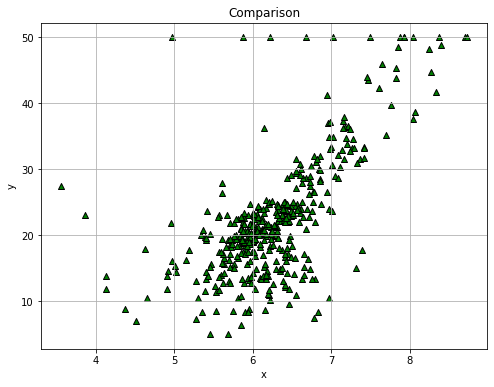

In [15]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(x, y, c='g', edgecolors='k', marker='^')
plt.grid('both')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison')
plt.show()

It's a good idea to normalize our data

In [16]:
x = normalize(x)
y = normalize(y)

x_val = normalize(x_val)
y_val = normalize(y_val)

Let's create our first Machine Learning Model

In [17]:
# Create the model
model = tf.keras.Sequential([tf.keras.layers.Dense(1, activation='linear')])
# Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001), loss='mse', metrics=['mae', 'mse'])
# Let's fit the model!
history = model.fit(x, y, batch_size=20, epochs=100)

Epoch 1/100
21/21 [==============================] - 0s 1ms/step - loss: 1.0729 - mae: 0.9801 - mse: 1.0729
Epoch 2/100
21/21 [==============================] - 0s 1ms/step - loss: 0.9721 - mae: 0.9278 - mse: 0.9721
Epoch 3/100
21/21 [==============================] - 0s 1ms/step - loss: 0.8812 - mae: 0.8790 - mse: 0.8812
Epoch 4/100
21/21 [==============================] - 0s 1ms/step - loss: 0.8009 - mae: 0.8333 - mse: 0.8009
Epoch 5/100
21/21 [==============================] - 0s 969us/step - loss: 0.7261 - mae: 0.7877 - mse: 0.7261
Epoch 6/100
21/21 [==============================] - 0s 1ms/step - loss: 0.6607 - mae: 0.7460 - mse: 0.6607
Epoch 7/100
21/21 [==============================] - 0s 981us/step - loss: 0.6013 - mae: 0.7062 - mse: 0.6013
Epoch 8/100
21/21 [==============================] - 0s 1ms/step - loss: 0.5472 - mae: 0.6675 - mse: 0.5472
Epoch 9/100
21/21 [==============================] - 0s 1ms/step - loss: 0.4995 - mae: 0.6323 - mse: 0.4995
Epoch 10/100
21/21 [====

Check the structure of our model

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Check the weights of a simple perceptron

In [19]:
model.get_weights()

[array([[-0.65072364]], dtype=float32), array([0.73619205], dtype=float32)]

Loss function trend

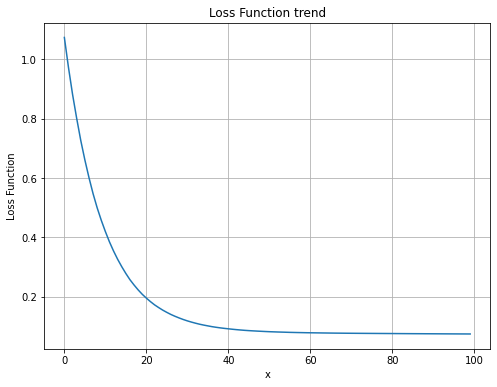

In [20]:
loss = history.history['loss']
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(loss)
plt.grid('both')
plt.xlabel('x')
plt.ylabel('Loss Function')
plt.title('Loss Function trend')
plt.show()

Check the quality of our model prediction

In [21]:
Y = model.predict(x)

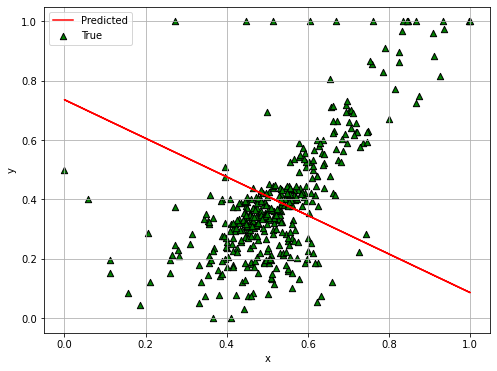

In [22]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(x, y, c='g', s=40, marker='^', edgecolors='k', label='True')
plt.plot(x, Y, c='r', label='Predicted')
plt.grid('both')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Improve The Model: create a Multi Layer Perceptron
---



In [23]:
# Create the model
mlp = tf.keras.Sequential([
                           tf.keras.layers.Dense(256, activation='relu', input_shape=[1]),
                           tf.keras.layers.Dropout(0.3),
                           tf.keras.layers.Dense(256, activation='relu', input_shape=[1]),
                           tf.keras.layers.Dropout(0.3),
                           tf.keras.layers.Dense(1, activation='sigmoid')
                          ])
# Compile the model
mlp.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse', metrics=['mae', 'mse'])

In [24]:
mlp.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               512       
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 66,561
Trainable params: 66,561
Non-trainable params: 0
_________________________________________________________________


We also consider the validation set!

In [25]:
# Let's fit the model!
history = mlp.fit(x, y, batch_size=32, epochs=1000, validation_data=(x_val, y_val))

Epoch 1/1000
13/13 [==============================] - 1s 18ms/step - loss: 0.0486 - mae: 0.1753 - mse: 0.0486 - val_loss: 0.0499 - val_mae: 0.1643 - val_mse: 0.0499
Epoch 2/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0464 - mae: 0.1594 - mse: 0.0464 - val_loss: 0.0454 - val_mae: 0.1588 - val_mse: 0.0454
Epoch 3/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0439 - mae: 0.1563 - mse: 0.0439 - val_loss: 0.0423 - val_mae: 0.1494 - val_mse: 0.0423
Epoch 4/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0399 - mae: 0.1478 - mse: 0.0399 - val_loss: 0.0384 - val_mae: 0.1410 - val_mse: 0.0384
Epoch 5/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0362 - mae: 0.1380 - mse: 0.0362 - val_loss: 0.0316 - val_mae: 0.1287 - val_mse: 0.0316
Epoch 6/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0316 - mae: 0.1348 - mse: 0.0316 - val_loss: 0.0336 - val_mae: 0.1407 - val_mse: 0.0336
Epoch 7/1000
13

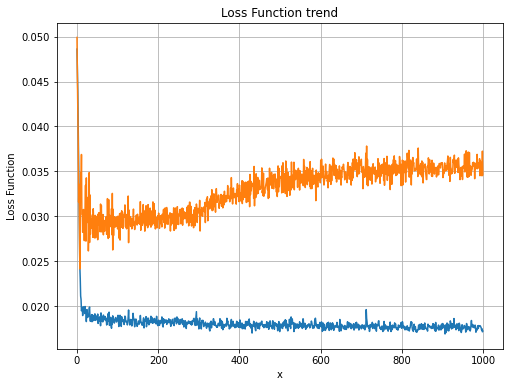

In [26]:
loss = history.history['loss']
val_loss = history.history['val_loss']
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(loss)
plt.plot(val_loss)
plt.grid('both')
plt.xlabel('x')
plt.ylabel('Loss Function')
plt.title('Loss Function trend')
plt.show()

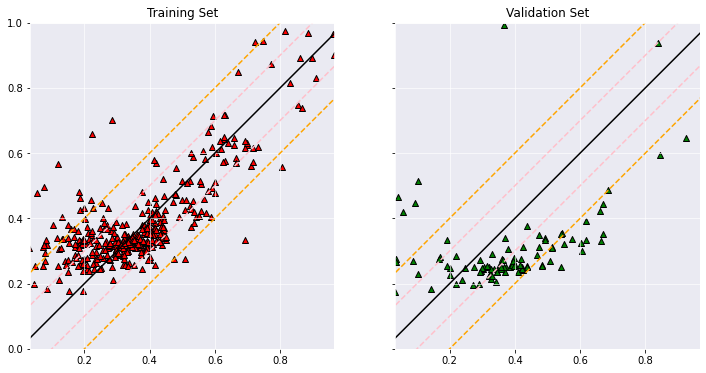

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
ax[0].axis('equal')
ax[0].scatter(y, mlp.predict(x), marker='^',
          color='r', edgecolor='k')
ax[0].plot([0, 1], [0, 1], c='k')
ax[0].plot([0, 1], [0.2, 1.2],'--', c='orange')
ax[0].plot([0, 1], [-0.2, 0.8],'--', c='orange')
ax[0].plot([0, 1], [0.1, 1.1],'--', c='pink')
ax[0].plot([0, 1], [-0.1, 0.9],'--', c='pink')
ax[0].set_title('Training Set')
ax[0].set_ylim(0, 1)
ax[0].grid(which='both', alpha=0.8, c='white')
ax[0].set_facecolor('#eaeaf2')
ax[0].spines['bottom'].set_color('white')
ax[0].spines['top'].set_color('white')
ax[0].spines['right'].set_color('white')
ax[0].spines['left'].set_color('white')

ax[1].axis('equal')
ax[1].scatter(y_val, mlp.predict(x_val), marker='^',
          color='g', edgecolor='k')
ax[1].plot([0, 1], [0, 1], c='k')
ax[1].plot([0, 1], [0.2, 1.2],'--', c='orange')
ax[1].plot([0, 1], [-0.2, 0.8],'--', c='orange')
ax[1].plot([0, 1], [0.1, 1.1],'--', c='pink')
ax[1].plot([0, 1], [-0.1, 0.9],'--', c='pink')
ax[1].set_title('Validation Set')
ax[1].set_ylim(0, 1)
ax[1].grid(which='both', alpha=0.8, c='white')
ax[1].set_facecolor('#eaeaf2')
ax[1].spines['bottom'].set_color('white')
ax[1].spines['top'].set_color('white')
ax[1].spines['right'].set_color('white')
ax[1].spines['left'].set_color('white')

In [29]:
metrics= {
    'mae-train': np.mean(np.abs(y - mlp.predict(x).reshape(-1))),
    'mse-train': np.mean(np.square(y - mlp.predict(x).reshape(-1))),
    'r2-train': r2_score(y, mlp.predict(x).reshape(-1)),
    'pearson-train': pearsonr(y, mlp.predict(x).reshape(-1))[0],
    'mae-test': np.mean(np.abs(y_val - mlp.predict(x_val).reshape(-1))),
    'mse-test': np.mean(np.square(y_val - mlp.predict(x_val).reshape(-1))),
    'r2-test': r2_score(y_val,mlp.predict(x_val).reshape(-1)),
    'pearson-test': pearsonr(y_val, mlp.predict(x_val).reshape(-1))[0]
}

blue = lambda x: '\033[94m' + x + '\033[0m'
yellow = lambda x: '\033[93m' + x + '\033[0m'

for key in metrics:
    if 'train' in key:
        print(f'{blue(key)} - {str(metrics[key])[:7]}')
    else:
        print(f'{yellow(key)} - {str(metrics[key])[:7]}')

mae-train - 0.08776
mse-train - 0.01728
r2-train - 0.58630
pearson-train - 0.76781
mae-test - 0.15591
mse-test - 0.03463
r2-test - 0.17989
pearson-test - 0.58371


### Greetings
---

In [30]:
!pip install art

In [31]:
from art import tprint, aprint
tprint('See you on next videos!')

 ____                                                                        _            _      _                    _ 
/ ___|   ___   ___   _   _   ___   _   _    ___   _ __    _ __    ___ __  __| |_  __   __(_)  __| |  ___   ___   ___ | |
\___ \  / _ \ / _ \ | | | | / _ \ | | | |  / _ \ | '_ \  | '_ \  / _ \\ \/ /| __| \ \ / /| | / _` | / _ \ / _ \ / __|| |
 ___) ||  __/|  __/ | |_| || (_) || |_| | | (_) || | | | | | | ||  __/ >  < | |_   \ V / | || (_| ||  __/| (_) |\__ \|_|
|____/  \___| \___|  \__, | \___/  \__,_|  \___/ |_| |_| |_| |_| \___|/_/\_\ \__|   \_/  |_| \__,_| \___| \___/ |___/(_)
                     |___/                                                                                              



In [32]:
def subscribe():
  """
  Attractive subscription form
  """
  aprint("giveme", number=5)
  print(f'\n\tLike and subscribe to support this work!\n')
  aprint("giveme", number=5)

In [33]:
# Let's add some final click-bait content
subscribe()

༼ つ ◕_◕ ༽つ ༼ つ ◕_◕ ༽つ ༼ つ ◕_◕ ༽つ ༼ つ ◕_◕ ༽つ ༼ つ ◕_◕ ༽つ 

	Like and subscribe to support this work!

༼ つ ◕_◕ ༽つ ༼ つ ◕_◕ ༽つ ༼ つ ◕_◕ ༽つ ༼ つ ◕_◕ ༽つ ༼ つ ◕_◕ ༽つ 
